# Exercises

## Load the data in the folder `data/building_consumption` into a pandas dataframe.

Data is separated in different files. Don't forget to concatenate them, converte the date column to a datetime object and set it as index. Also, sort the index as the loading order might place reading on an unsorted order.

In [27]:
import os
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
import numpy as np

# set pandas_bokeh to output inline
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [28]:
# get files in the folder ending with .csv
import glob
files = glob.glob('./../data/building_consumption/*.csv')
files.sort()
files

['./../data/building_consumption/20180831230000_20181231000000_Node 5.csv',
 './../data/building_consumption/20190101000000_20190427230000_Node 5.csv',
 './../data/building_consumption/20190430230000_20190830230000_Node 5.csv',
 './../data/building_consumption/20190831230000_20191231000000_Node 5.csv',
 './../data/building_consumption/20200101000000_20200429230000_Node 5.csv',
 './../data/building_consumption/20200430230000_20200830230000_Node 5.csv',
 './../data/building_consumption/20200831230000_20201231000000_Node 5.csv',
 './../data/building_consumption/20210101000000_20210429230000_Node 5.csv',
 './../data/building_consumption/20210430230000_20210830230000_Node 5.csv',
 './../data/building_consumption/20210831230000_20211231000000_Node 5.csv',
 './../data/building_consumption/20220101000000_20220429230000_Node 5.csv',
 './../data/building_consumption/20220430230000_20220830230000_Node 5.csv',
 './../data/building_consumption/20220831230000_20221231000000_Node 5.csv',
 './../data/

In [29]:
# load the files into a dataframe
df = pd.DataFrame()
for file in files:
    df_temp = pd.read_csv(file, header=0, sep=',',  parse_dates=True)
    df = pd.concat([df, df_temp], axis=0)
    print('loaded file', file, 'start date', df_temp['Timestamp'].min(), 'end date', df_temp['Timestamp'].max())

print('loaded dataframe with shape:', df.shape)

df.head()

loaded file ./../data/building_consumption/20180831230000_20181231000000_Node 5.csv start date 01/09/2018 00:00:00 end date 31/12/2018 00:30:00
loaded file ./../data/building_consumption/20190101000000_20190427230000_Node 5.csv start date 01/01/2019 00:00:00 end date 31/03/2019 23:30:00
loaded file ./../data/building_consumption/20190430230000_20190830230000_Node 5.csv start date 01/05/2019 00:00:00 end date 31/07/2019 23:30:00
loaded file ./../data/building_consumption/20190831230000_20191231000000_Node 5.csv start date 01/09/2019 00:00:00 end date 31/12/2019 00:30:00
loaded file ./../data/building_consumption/20200101000000_20200429230000_Node 5.csv start date 01/01/2020 00:00:00 end date 31/03/2020 23:30:00
loaded file ./../data/building_consumption/20200430230000_20200830230000_Node 5.csv start date 01/05/2020 00:00:00 end date 31/07/2020 23:30:00
loaded file ./../data/building_consumption/20200831230000_20201231000000_Node 5.csv start date 01/09/2020 00:00:00 end date 31/12/2020 0

,Timestamp,Corrente A,Corrente B,Corrente C,Potencia,Tensao A,Tensao B,Tensao C,energy cost 1,energy cost 2,energy cost 3
0,31/08/2018 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/08/2018 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/09/2018 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/09/2018 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/09/2018 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# convert the Timestamp column to a datetime
df.Timestamp = pd.to_datetime(df.Timestamp, format='%d/%m/%Y %H:%M:%S')

# set the timestamp as index
df.set_index('Timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81004 entries, 2018-08-31 23:00:00 to 2023-04-29 23:30:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Corrente A     76496 non-null  float64
 1   Corrente B     76496 non-null  float64
 2   Corrente C     76496 non-null  float64
 3   Potencia       76496 non-null  float64
 4   Tensao A       76496 non-null  float64
 5   Tensao B       76496 non-null  float64
 6   Tensao C       76496 non-null  float64
 7   energy cost 1  64360 non-null  float64
 8   energy cost 2  67772 non-null  float64
 9   energy cost 3  47797 non-null  float64
dtypes: float64(10)
memory usage: 6.8 MB


## Plot the dataframe and look for possible outliers
Looking at the data can many times be found as a first step in the anomaly detection process.

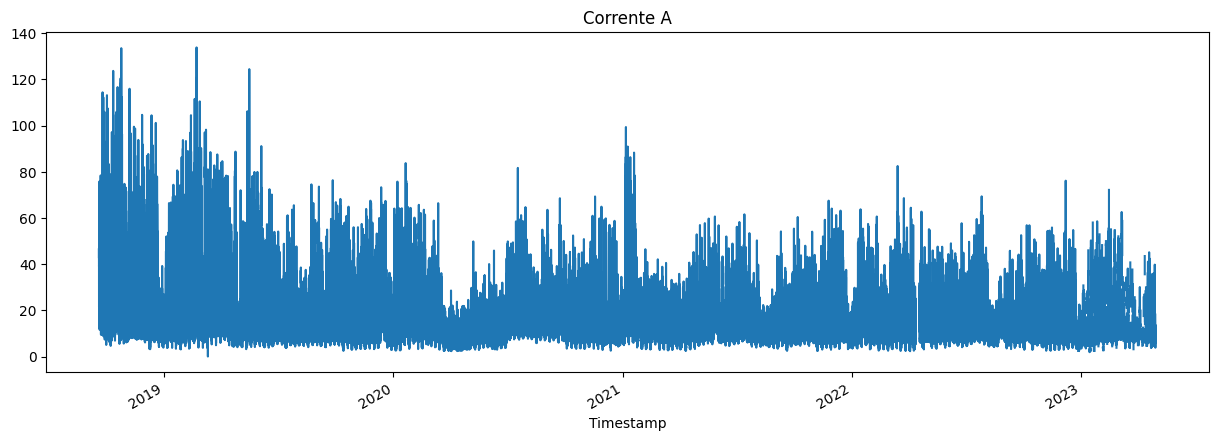

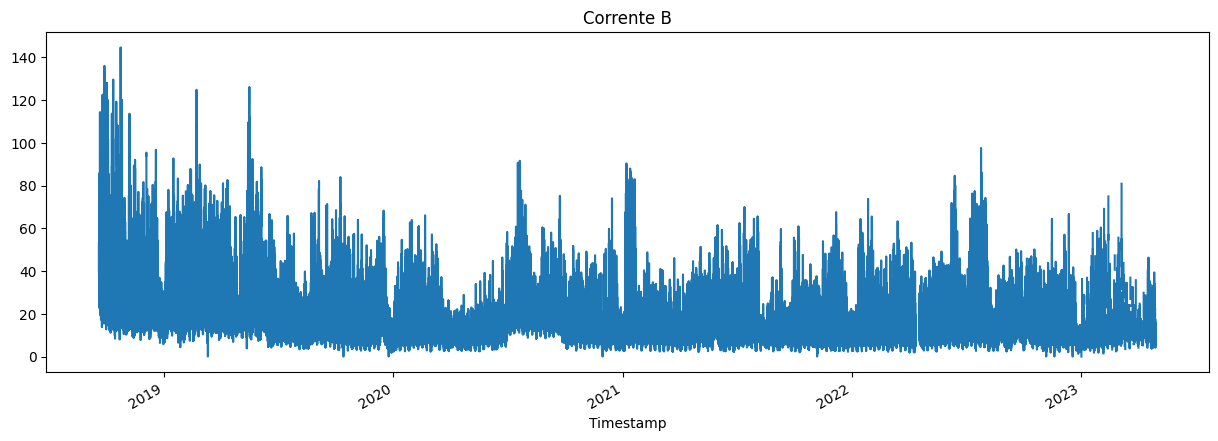

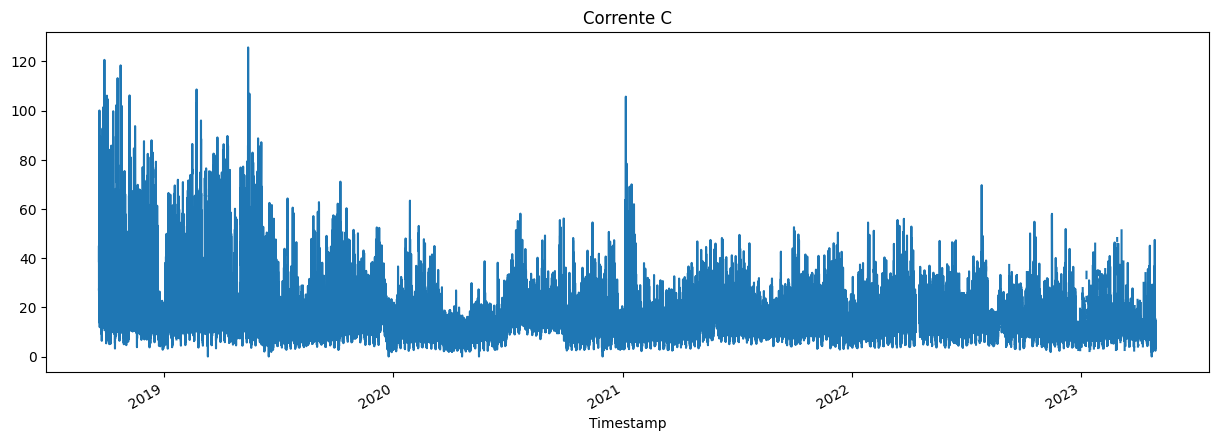

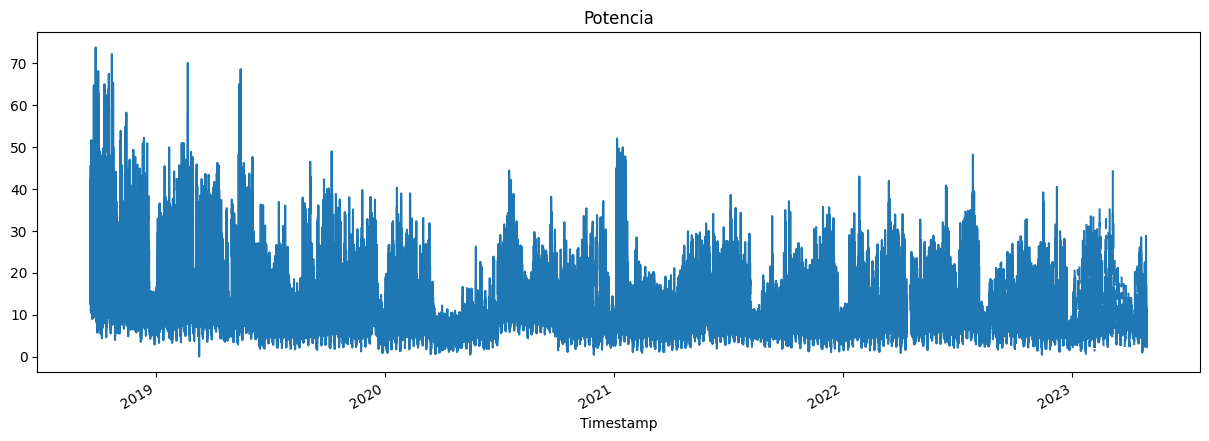

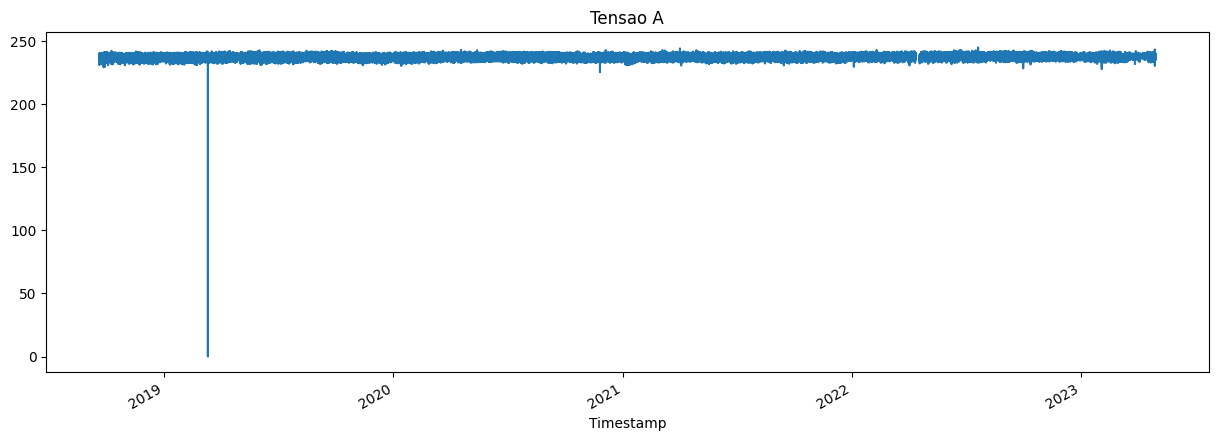

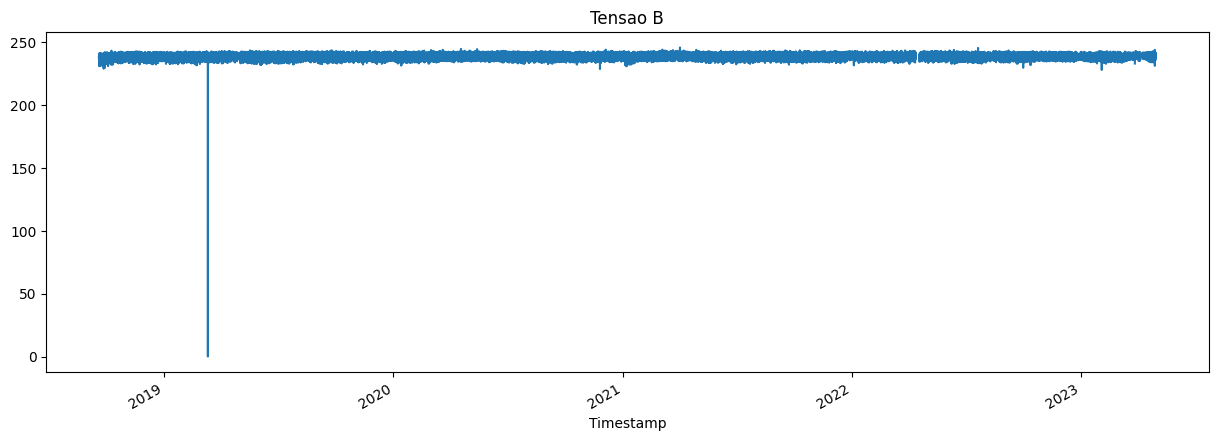

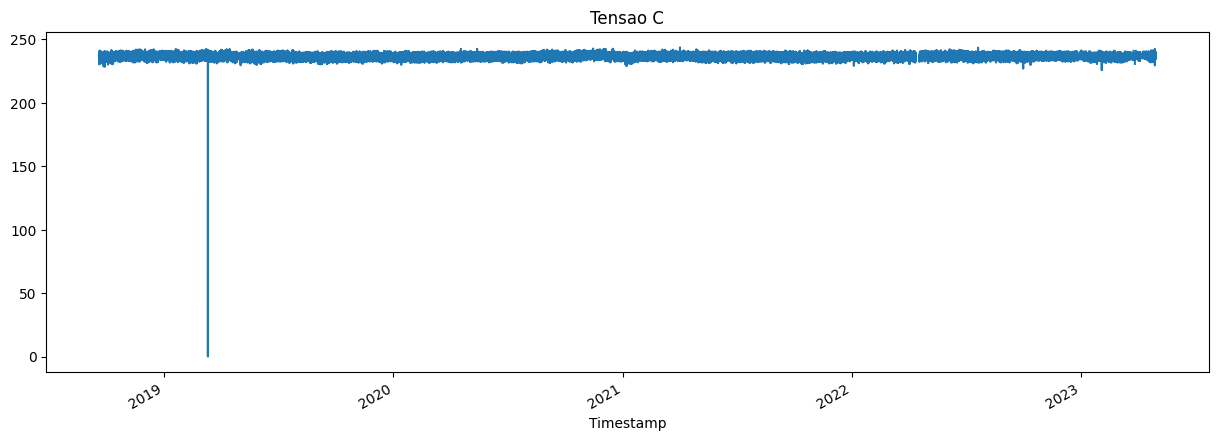

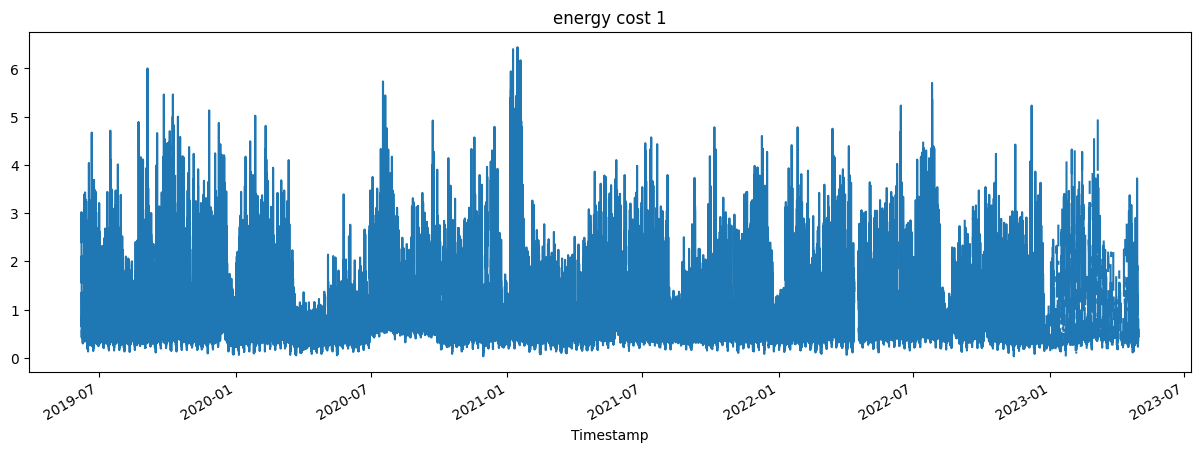

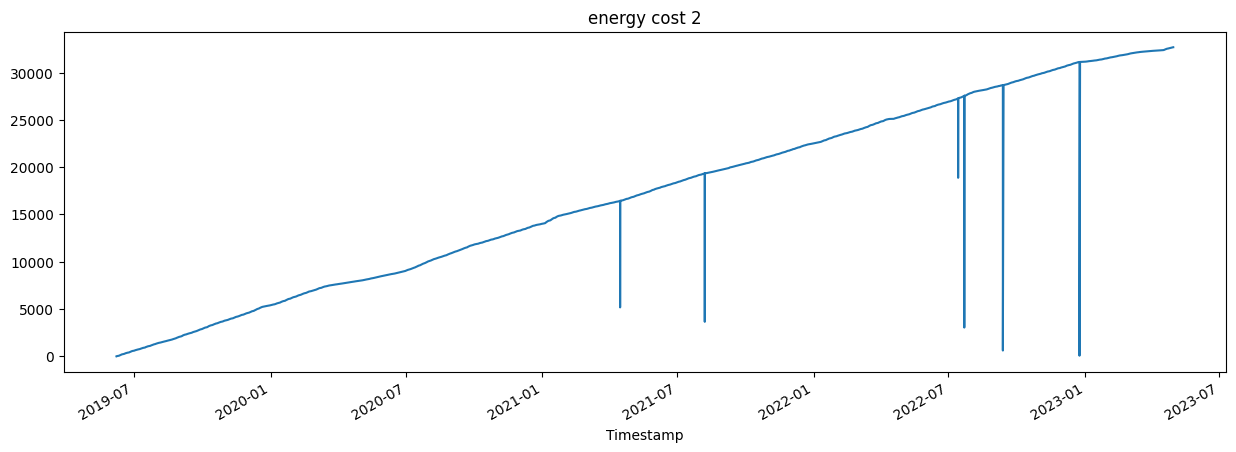

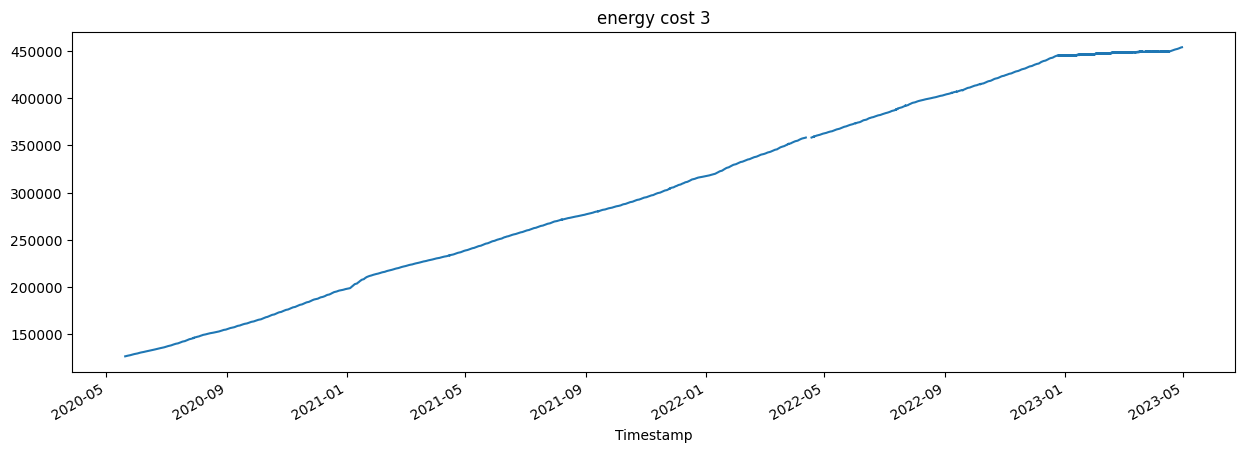

In [31]:
# plot the dataframe for each column
for col in df.columns:
    df[col].plot(title=col, figsize=(15, 5))
    plt.show()


## Get the data for the "Corrente A" column, drop nan, re-sample to 24 hours (sum), fill nan with last value, and see the last 10 lines and plot it

In [34]:
df_corrente_a = df['Corrente A']
df_corrente_a.dropna(inplace=True)
df_corrente_a = df_corrente_a.resample('D').mean()
df_corrente_a.fillna(method='ffill', inplace=True)
df_corrente_a.tail(10)

Timestamp
2023-04-20    17.219167
2023-04-21    12.666875
2023-04-22     7.425000
2023-04-23     8.530417
2023-04-24    14.376250
2023-04-25     7.528333
2023-04-26    16.199375
2023-04-27    14.531667
2023-04-28    15.004583
2023-04-29     7.916667
Freq: D, Name: Corrente A, dtype: float64

<Axes: title={'center': 'Corrente A'}, xlabel='Timestamp'>

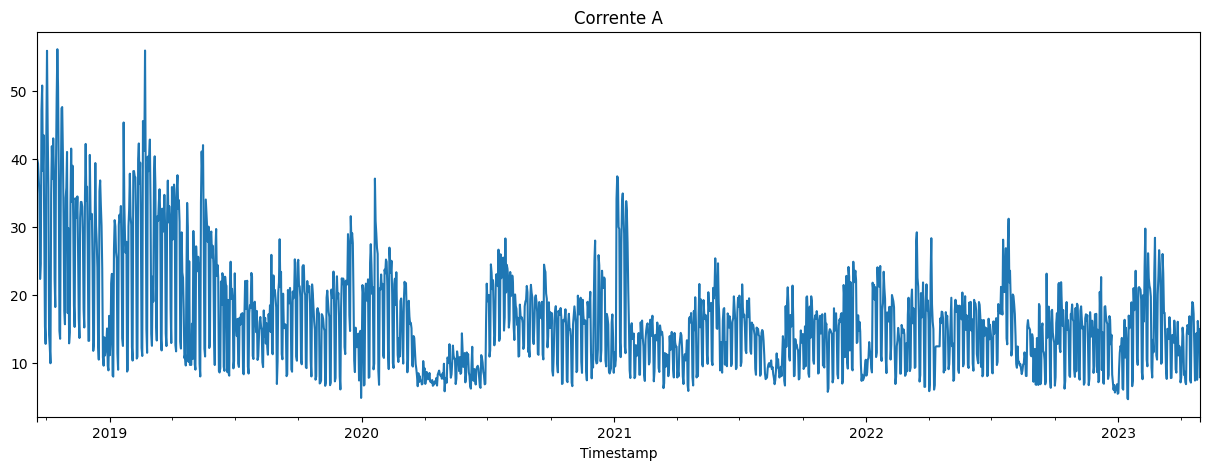

In [35]:
df_corrente_a.plot(title='Corrente A', figsize=(15, 5))

## Use the Z-score to detect outliers in the "Corrente A" column
1. compute the z-score for the "Corrente A" column
2. plot the "Corrente A" column marking the outliers with a different color

Comment the results!

In [36]:
from scipy import stats
import numpy as np

def my_zscore(serie):
    _mean = serie.mean()
    _std = serie.std()

    return (serie - _mean) / _std

df_corrente_a_zscore = my_zscore(df_corrente_a)
df_corrente_a_zscore

Timestamp
2018-09-18    2.857726
2018-09-19    2.796859
2018-09-20    2.503581
2018-09-21    2.257215
2018-09-22    0.718042
                ...   
2023-04-25   -1.097490
2023-04-26   -0.036880
2023-04-27   -0.240868
2023-04-28   -0.183022
2023-04-29   -1.049990
Freq: D, Name: Corrente A, Length: 1685, dtype: float64

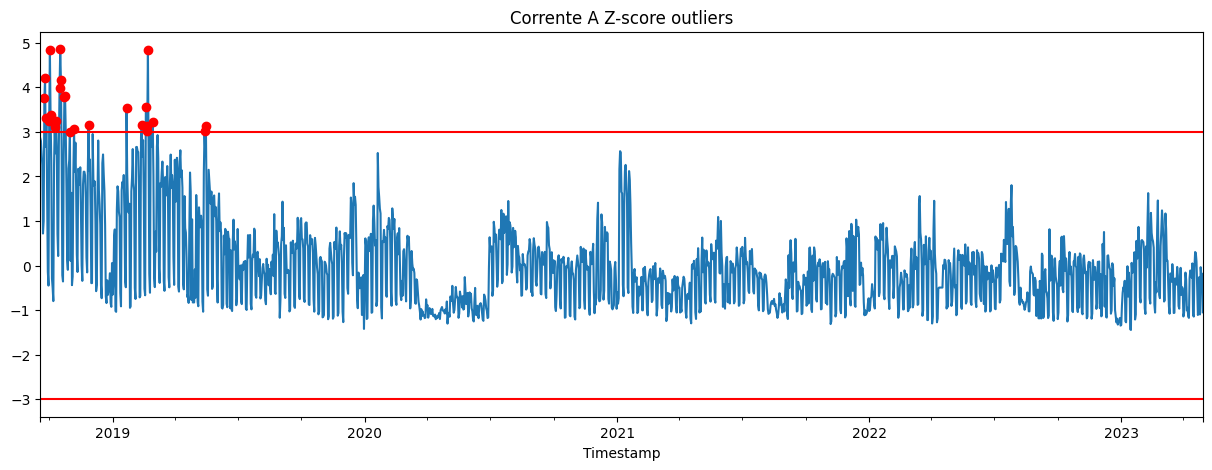

In [37]:
# plot the "Corrente A" column marking the outliers with a different color
df_corrente_a_zscore.plot(title='Corrente A Z-score', figsize=(15, 5))

# get the readings with z-score > 3 or < -3
mask = (df_corrente_a_zscore > 3) | (df_corrente_a_zscore < -3)
df_corrente_a_zscore[mask].plot(style='ro', title='Corrente A Z-score outliers', figsize=(15, 5))



plt.axhline(y=3, color='r', linestyle='-')
plt.axhline(y=-3, color='r', linestyle='-')

## Use the exponential moving average to detect outliers in the "Corrente A" column
1. compute the exponential moving average for the "Corrente A" column
2. plot the "Corrente A" column marking the outliers with a different color
3. plot the exponential moving average for the "Corrente A" column marking the outliers with a different color

Comment this results also taking into account the previous results!

In [46]:
alpha = 0.75
threshold = 3

# calculate the smoothed values
df_corrente_a_exp_smooting = pd.DataFrame(index=df_corrente_a.index,
                                          columns=['Corrente A', 's'],
                                          dtype='float64')
df_corrente_a_exp_smooting['Corrente A'] = df_corrente_a.copy()
df_corrente_a_exp_smooting['s'] = df_corrente_a.copy()

for t_minus_1, t in zip(df_corrente_a_exp_smooting.index[:-1], df_corrente_a_exp_smooting.index[1:]):
    df_corrente_a_exp_smooting.loc[t, 's'] = alpha * df_corrente_a_exp_smooting.loc[t, 'Corrente A'] + (1-alpha) * df_corrente_a_exp_smooting.loc[t_minus_1, 's']

df_corrente_a_exp_smooting.tail()

,Corrente A,s
Timestamp,,
2023-04-25,7.528333,8.882922
2023-04-26,16.199375,14.370262
2023-04-27,14.531667,14.491315
2023-04-28,15.004583,14.876266
2023-04-29,7.916667,9.656567


<Axes: title={'center': 'Corrente A EMA'}, xlabel='Timestamp'>

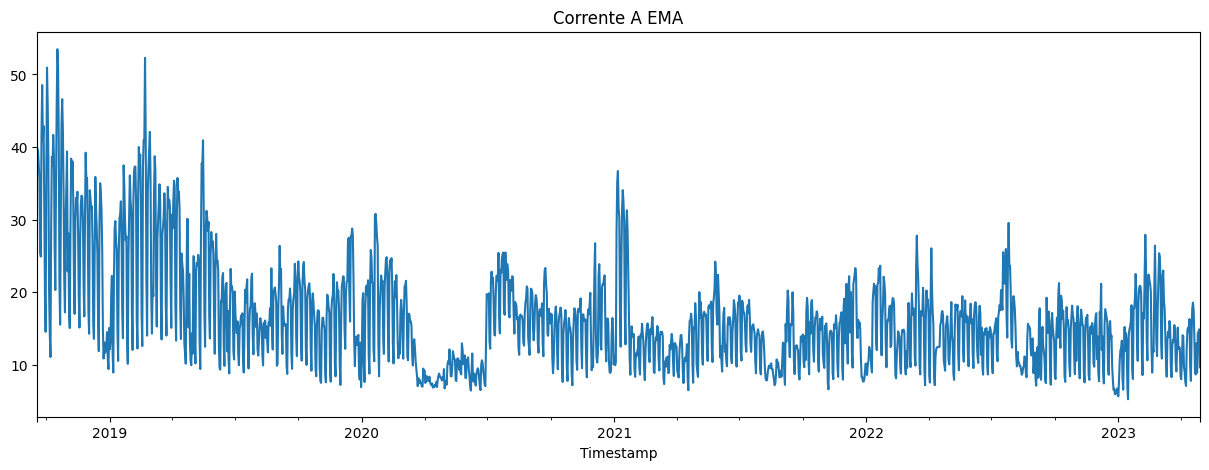

In [47]:
df_corrente_a_exp_smooting['s'].plot(figsize=(15, 5), title='Corrente A EMA')

In [48]:
 # step 3 - calculate the deviation
df_corrente_a_exp_smooting['deviation'] = df_corrente_a_exp_smooting['Corrente A'] - df_corrente_a_exp_smooting['s']

# step 4 - calculate the standard deviation of the deviations
std_dev = df_corrente_a_exp_smooting['deviation'].std()

# Identify anomalies - those points whose absolute deviation exceeds threshold x standard deviations
mask = (df_corrente_a_exp_smooting['deviation'] < -threshold) | (df_corrente_a_exp_smooting['deviation'] > threshold)
potential_outliers = df_corrente_a_exp_smooting.loc[mask, 'Corrente A']

print()
print("Potential anomalies:")
potential_outliers


Potential anomalies:


Timestamp
2018-09-22    22.371250
2018-09-24    47.190833
2018-09-28    28.961042
2018-09-29    15.404792
2018-10-01    43.023333
                ...    
2023-01-23    21.024444
2023-02-11    10.520667
2023-02-13    26.159355
2023-03-04     9.891250
2023-03-06    26.049630
Name: Corrente A, Length: 138, dtype: float64

<Axes: title={'center': 'Corrente A outliers'}, xlabel='Timestamp'>

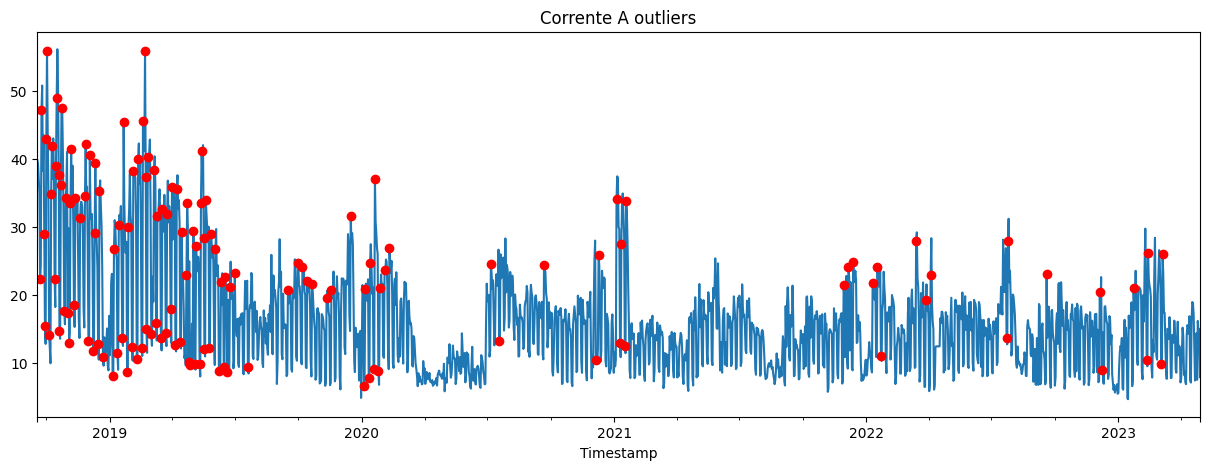

In [49]:
# plot the "Corrente A" column marking the outliers with a different color
df_corrente_a.plot(title='Corrente A', figsize=(15, 5))
df_corrente_a.loc[potential_outliers.index].plot(style='ro', title='Corrente A outliers', figsize=(15, 5))

## Use the modified Z-score to detect outliers in the "Corrente A" column. Try different thresholds and comment the results!


In [50]:
from math import fabs
def modified_z_score(serie, threshold=3):
    # calculate median absolute deviation
    median = serie.median()
    mad = (serie- median).apply(fabs).median()

    print(f'median: {median}')
    print(f'MAD: {mad}')

    # calculate modified Z-scores for each data point
    m_z_scores = 0.6745 * (serie - median) / mad

    # identify data points above threshold as potential outliers
    mask = (m_z_scores < -threshold) | (m_z_scores > threshold)
    potential_outliers = serie[mask]

    return potential_outliers


In [51]:
threshold = 1
potential_outliers = modified_z_score(df_corrente_a, threshold)

print()
print("Potential outliers:")
potential_outliers

median: 15.241041666666668
MAD: 4.971250000000001

Potential outliers:


Timestamp
2018-09-18    39.864286
2018-09-19    39.366667
2018-09-20    36.968958
2018-09-21    34.954792
2018-09-23    24.644167
                ...    
2023-04-09     6.890000
2023-04-15     7.492353
2023-04-16     7.128696
2023-04-22     7.425000
2023-04-25     7.528333
Name: Corrente A, Length: 443, dtype: float64

<Axes: title={'center': 'Corrente A outliers'}, xlabel='Timestamp'>

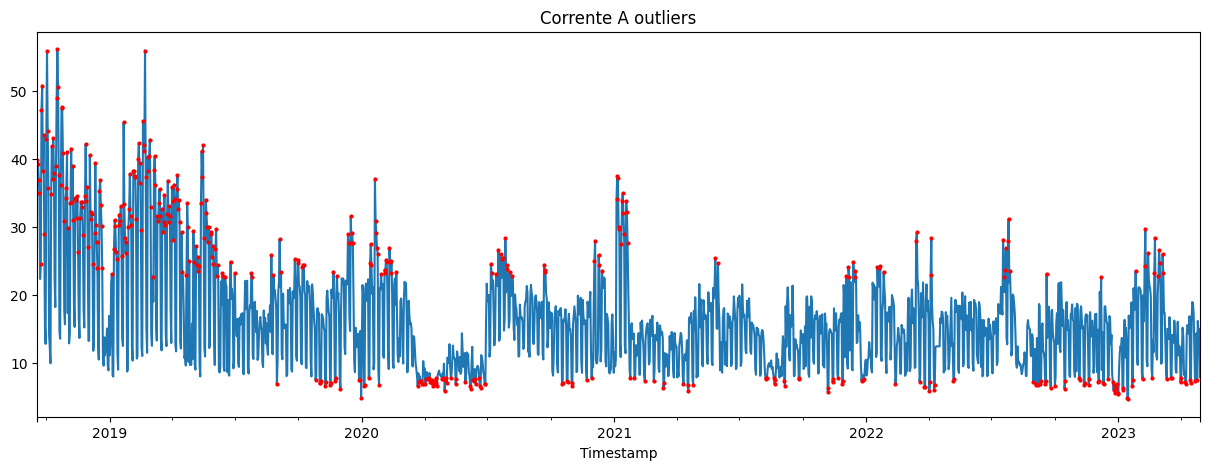

In [52]:
# plot the "Corrente A" column marking the outliers with a different color
ax = df_corrente_a.plot(title='Corrente A', figsize=(15, 5))
potential_outliers.plot(style='ro', title='Corrente A outliers', figsize=(15, 5), markersize=2, ax=ax)

## Use the Isolation Forest to detect outliers in the "Corrente A" column. Try different contamination values and comment the results

In [53]:
from sklearn.ensemble import IsolationForest

# fit the model
model = IsolationForest(contamination=0.05)
model.fit(df_corrente_a.values.reshape(-1, 1))

# get the predictions
predictions = model.predict(df_corrente_a.values.reshape(-1, 1))

# get the outliers
mask = predictions == -1
potential_outliers = df_corrente_a[mask]

print()
print("Potential outliers:")
potential_outliers


Potential outliers:


Timestamp
2018-09-18    39.864286
2018-09-19    39.366667
2018-09-20    36.968958
2018-09-21    34.954792
2018-09-24    47.190833
                ...    
2022-12-31     5.480000
2023-01-01     5.588571
2023-01-08     6.081852
2023-01-14     4.812917
2023-01-15     4.678889
Name: Corrente A, Length: 85, dtype: float64

<Axes: title={'center': 'Corrente A outliers'}, xlabel='Timestamp'>

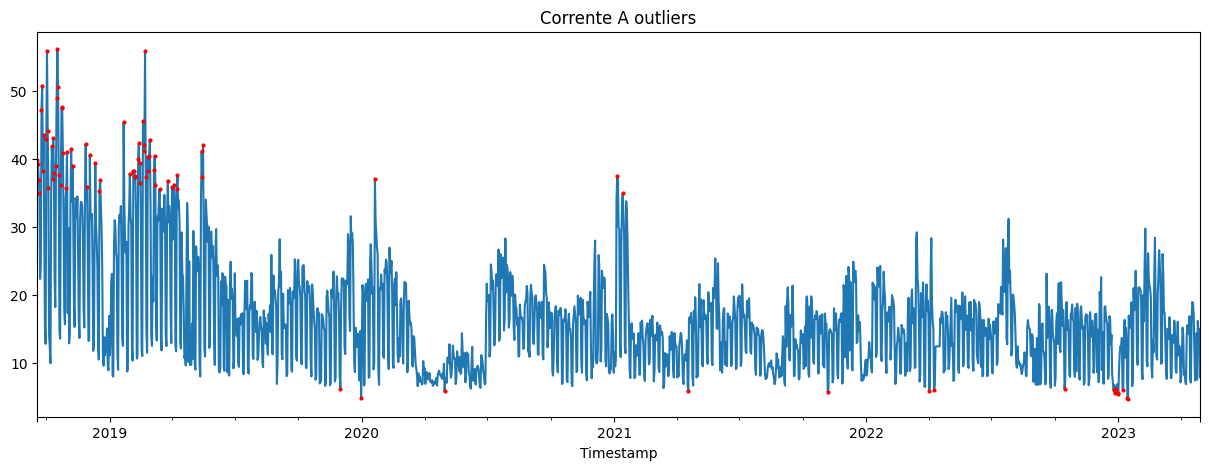

In [54]:
# plot the predictions
ax = df_corrente_a.plot(title='Corrente A', figsize=(15, 5))
potential_outliers.plot(style='ro', title='Corrente A outliers', figsize=(15, 5), markersize=2, ax=ax)

## Do the same but now add columns with day of week and month of year to the dataframe

In [55]:
df_corrente_a_extended = pd.DataFrame()
df_corrente_a_extended['Corrente A'] = df_corrente_a.copy()
df_corrente_a_extended.index = df_corrente_a.index

df_corrente_a_extended['day_of_week'] = df_corrente_a_extended.index.dayofweek
df_corrente_a_extended['month_of_year'] = df_corrente_a_extended.index.month

df_corrente_a_extended.head()

,Corrente A,day_of_week,month_of_year
Timestamp,,,
2018-09-18,39.864286,1,9
2018-09-19,39.366667,2,9
2018-09-20,36.968958,3,9
2018-09-21,34.954792,4,9
2018-09-22,22.371250,5,9


In [56]:
# Isolation Forest
# fit the model
model = IsolationForest(contamination=0.05)
model.fit(df_corrente_a_extended)

# get the predictions
predictions = model.predict(df_corrente_a_extended)

# get the outliers
mask = predictions == -1
potential_outliers = df_corrente_a_extended[mask]

print()
print("Potential outliers:")
potential_outliers


Potential outliers:


/Users/pcardoso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Corrente A,day_of_week,month_of_year
Timestamp,,,
2018-09-18,39.864286,1,9
2018-09-19,39.366667,2,9
2018-09-23,24.644167,6,9
2018-09-24,47.190833,0,9
2018-09-25,50.840000,1,9
...,...,...,...
2023-01-01,5.588571,6,1
2023-01-02,9.186842,0,1
2023-01-08,6.081852,6,1


<Axes: title={'center': 'Corrente A outliers'}, xlabel='Timestamp'>

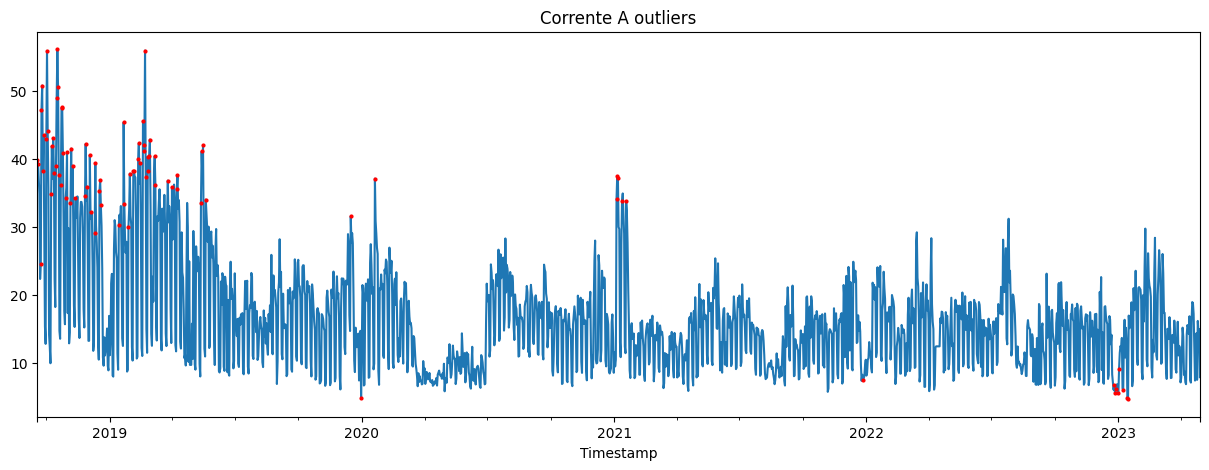

In [57]:
# plot the outliers
ax = df_corrente_a_extended['Corrente A'].plot(title='Corrente A', figsize=(15, 5))
potential_outliers['Corrente A'].plot(style='ro', title='Corrente A outliers', figsize=(15, 5), markersize=2, ax=ax)